In [1]:
import numpy as np
import scipy as sp

We will have a look at normal distributions using a dataset containing information about heights and weights of 1000 people

In [2]:
# dataset = np.genfromtxt('../datasets/weight-height.csv', dtype=[('mystring','S5'), ('myfloat_h', 'f8'), ('myfloat_w', 'f8')], names=True)
dataset = from_file = np.genfromtxt(
    "../datasets/weight-height.csv",
    delimiter=',',
    names=True,
    dtype=('U8', 'f8', 'f8')
)
dataset.shape


(10000,)

The dataset as loaded is a structured array

Structured arrays are ndarrays whose datatype is a composition of simpler datatypes organized as a sequence of named fields.

Structured datatypes are implemented in numpy to have base type `numpy.void`

We have to break our structured array in homogeneous arrays.

In [3]:
type(dataset[0])

numpy.void

In [4]:
dataset

array([('"Male"', 73.84701702, 241.89356318),
       ('"Male"', 68.78190405, 162.31047252),
       ('"Male"', 74.11010539, 212.74085556), ...,
       ('"Female"', 63.86799221, 128.47531878),
       ('"Female"', 69.03424313, 163.85246135),
       ('"Female"', 61.94424588, 113.64910268)],
      dtype=[('Gender', '<U8'), ('Height', '<f8'), ('Weight', '<f8')])

In [5]:
genders, heights, weights = np.asarray([el[0] for el in dataset]), np.asarray([el[1] for el in dataset]), np.asarray([el[2] for el in dataset])

In [6]:
genders

array(['"Male"', '"Male"', '"Male"', ..., '"Female"', '"Female"',
       '"Female"'], dtype='<U8')

In [7]:
heights

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [8]:
weights

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

## A Histogram with Numpy

Let us now visualize the distribution of heights and weights using a histogram

In [9]:
h_hist, h_bin_edges = np.histogram(heights)
w_hist, w_bin_edges = np.histogram(weights)
print(h_hist)
print(h_bin_edges)

[  23  218  926 1906 2196 2167 1612  765  163   24]
[54.26313333 56.73669423 59.21025513 61.68381603 64.15737693 66.63093784
 69.10449874 71.57805964 74.05162054 76.52518144 78.99874235]


## A Histogram and Kernel Density Estimation (KDE) with SciPy and Matplotlib

Kernel density estimation is the process of estimating an unknown probability density function using a kernel function.

SciPy offers one KDE estimator to estimate Gaussian density functions. We will see now how we can use it to plot the density function for our height histograms.


In [10]:
from scipy.stats import gaussian_kde
h_density = gaussian_kde(heights)

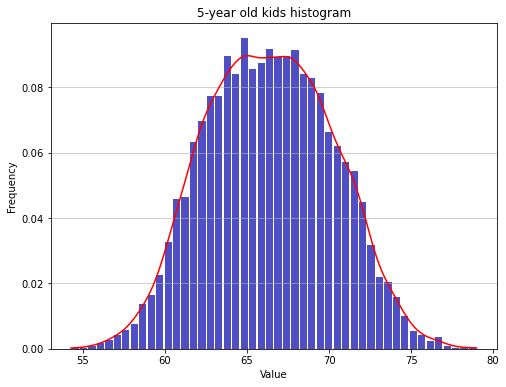

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6))
# An "interface" to matplotlib.axes.Axes.hist() method
ax.hist(
  x=heights,
  density=True,
  bins='auto',
  color='#0504aa',
  alpha=0.7,
  rwidth=0.85
)
ax.grid(axis='y', alpha=0.75)
# set labels, title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('5-year old kids histogram')
# add a text 
# ax.text(55, 0.09, r'$\mu=15, b=3$')

# plot the Kernel Density Distribution on top
grid = np.arange(heights.min(), heights.max(), 0.01) # create a linear grid on which to plot the KDE
_ = ax.plot(grid, h_density(grid).T, color="r")

#### Getting mean and standard deviation for our height distributions:

In [12]:
h_mean = heights.mean()
h_mean

66.36755975482124

In [13]:
h_std = heights.std()
h_std

3.84733573955754